# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

<img src="https://allthatsinteresting.com/wordpress/wp-content/uploads/2016/03/giphy-4.gif" width="700px">

**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity 
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption 
- `year`  


>dataset: `Ex2.2._Happiness-Score.csv`

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0, '/Users/beejalparekh/Desktop/Bootcamp/_DA_course/_functions_/')

from functions_eda import *

### Exercise 1.Tell a story with your dataset, to try to answer the following question:

>"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

To achieve this goal, use the different funcionalities from the visualization libraries that you have seen in the module.

1. Understanding the Data
* Load the dataset (e.g., using Pandas in Python).
* Check the structure (rows, columns, data types).
* Identify missing values and duplicates.
* Understand the data dictionary and business context.

In [3]:
# reads csv file (Project1._Happiness-Score.csv) 
happiness_score = pd.read_csv('../_bi_moduleProjects/Ex2.2._Happiness-Score.csv')
# copy of the df before making any changes
raw_data = happiness_score.copy()

In [4]:
happiness_score.head()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,66,66,67,Moldova,5.640,0.657,1.301,NaN,0.232,0.171,0.000,2018
1,92,92,93,Bosnia and Herzegovina,5.129,0.915,1.078,NaN,0.280,0.216,0.000,2018
2,226,70,71,Moldova,5.529,0.685,1.328,NaN,0.245,0.181,0.000,2019
3,51,51,52,Romania,5.945,1.116,1.219,NaN,0.528,0.088,0.001,2018
4,252,96,97,Bulgaria,5.011,1.092,1.513,NaN,0.311,0.081,0.004,2019


In [5]:
#check the structure of the data
happiness_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Unnamed: 0                    312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [6]:
happiness_score.describe()

,Unnamed: 0.1,Unnamed: 0,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,7.000000,312.000000,312.000000,311.000000,312.000000
mean,155.500000,77.500000,78.500000,5.391506,0.898298,1.211026,0.038571,0.423538,0.182926,0.111299,2018.500000
std,90.210864,45.104737,45.104737,1.114631,0.394592,0.300310,0.035213,0.156024,0.096739,0.095365,0.500803
min,0.000000,0.000000,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
25%,77.750000,38.750000,39.750000,4.514250,0.609500,1.055750,0.005000,0.322500,0.108750,0.050000,2018.000000
50%,155.500000,77.500000,78.500000,5.379500,0.960000,1.265500,0.048000,0.449500,0.175500,0.082000,2018.500000
75%,233.250000,116.250000,117.250000,6.176000,1.219500,1.457500,0.066000,0.540250,0.245000,0.140500,2019.000000
max,311.000000,155.000000,156.000000,7.769000,2.096000,1.644000,0.080000,0.724000,0.598000,0.457000,2019.000000


2. Data Cleaning
* Handle missing values (drop, impute, or fill).
* Remove duplicates.
* Fix inconsistencies (e.g., incorrect data formats, spelling errors).
* Convert data types if needed.

In [7]:
# check for duplicates
happiness_score.duplicated().sum()

np.int64(0)

In [8]:
# remove 2 unnamed columns with unknown data in
happiness_score.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], inplace = True)

In [9]:
# remove healthy life expectancy column as it contains too many null values (305/312)
happiness_score.drop(columns = ['Healthy life expectancy'], inplace = True)

In [10]:
#create new columns with percentages for variables
happiness_score['Social percentage'] = (happiness_score['Social support'] / 2) * 100
happiness_score['Freedom percentage'] = happiness_score['Freedom to make life choices'] * 100
happiness_score['Generosity percentage'] = happiness_score['Generosity'] * 100
happiness_score['Corruption percentage'] = happiness_score['Perceptions of corruption'] * 100

In [11]:
# TO DO what to do with null value for UAE in perceptions of corruption? LEAVE for now. 
happiness_score[happiness_score['Perceptions of corruption'].isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Social percentage,Freedom percentage,Generosity percentage,Corruption percentage
311,20,United Arab Emirates,6.774,2.096,0.776,0.284,0.186,NaN,2018,38.8,28.4,18.6,NaN


In [12]:
# LEAVE FOR NOW countries that have min value 0 in a column
print('Countries with 0 value in GDP per capita')
print(happiness_score[happiness_score['GDP per capita']==0])
print('----------------------')
print('Countries with 0 value in Social support')
print(happiness_score[happiness_score['Social support']==0])
print('----------------------')
print('Countries with 0 value in Freedom to make life choices')
print(happiness_score[happiness_score['Freedom to make life choices']==0])
print('----------------------')
print('Countries with 0 value in Generosity')
print(happiness_score[happiness_score['Generosity']==0])
print('----------------------')
print('Countries with 0 value in Perceptions of corruption')
print(happiness_score[happiness_score['Perceptions of corruption']==0])

Countries with 0 value in GDP per capita
     Overall rank Country or region  Score  GDP per capita  Social support  \
278           112           Somalia  4.668             0.0           0.698   
282            98           Somalia  4.982             0.0           0.712   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
278                         0.559       0.243                      0.270   
282                         0.674       0.238                      0.282   

     year  Social percentage  Freedom percentage  Generosity percentage  \
278  2019               34.9                55.9                   24.3   
282  2018               35.6                67.4                   23.8   

     Corruption percentage  
278                   27.0  
282                   28.2  
----------------------
Countries with 0 value in Social support
    Overall rank         Country or region  Score  GDP per capita  \
54           155  Central African Republic  3.083

In [13]:
countries_more = list(happiness_score['Country or region'].value_counts()[lambda x: x>1].index)
len(countries_more)

152

In [14]:
#check for countries that only appear once
#152 countries have values for 2018 and 2019, 4 countries only have values for 2019 and 4 only have values for 2019
countries_once = list(happiness_score['Country or region'].value_counts()[lambda x: x==1].index)
countries_once

['Belize',
 'Sudan',
 'Comoros',
 'Angola',
 'Macedonia',
 'North Macedonia',
 'Swaziland',
 'Gambia']

In [15]:
# dataframe for countries that only appear once
happiness_score[happiness_score['Country or region'].isin(countries_once)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Social percentage,Freedom percentage,Generosity percentage,Corruption percentage
51,84,North Macedonia,5.274,0.983,1.294,0.345,0.185,0.034,2019,64.70,34.5,18.5,3.4
82,89,Macedonia,5.185,0.959,1.239,0.394,0.173,0.052,2018,61.95,39.4,17.3,5.2
109,142,Angola,3.795,0.730,1.125,0.000,0.079,0.061,2018,56.25,0.0,7.9,6.1
143,142,Comoros,3.973,0.274,0.757,0.142,0.275,0.078,2019,37.85,14.2,27.5,7.8
154,137,Sudan,4.139,0.605,1.240,0.016,0.134,0.082,2018,62.00,1.6,13.4,8.2
165,49,Belize,5.956,0.807,1.101,0.593,0.183,0.089,2018,55.05,59.3,18.3,8.9
228,135,Swaziland,4.212,0.811,1.149,0.313,0.074,0.135,2019,57.45,31.3,7.4,13.5
257,120,Gambia,4.516,0.308,0.939,0.382,0.269,0.167,2019,46.95,38.2,26.9,16.7


In [16]:
happiness_score[happiness_score['Country or region'].isin(['Spain', 'United Kingdom', 'France'])]

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Social percentage,Freedom percentage,Generosity percentage,Corruption percentage
128,36,Spain,6.310,1.251,1.538,0.449,0.142,0.074,2018,76.90,44.9,14.2,7.4
145,30,Spain,6.354,1.286,1.484,0.362,0.153,0.079,2019,74.20,36.2,15.3,7.9
150,11,United Kingdom,7.190,1.244,1.433,0.464,0.262,0.082,2018,71.65,46.4,26.2,8.2
263,23,France,6.489,1.293,1.466,0.520,0.098,0.176,2018,73.30,52.0,9.8,17.6
269,24,France,6.592,1.324,1.472,0.436,0.111,0.183,2019,73.60,43.6,11.1,18.3
280,15,United Kingdom,7.054,1.333,1.538,0.450,0.348,0.278,2019,76.90,45.0,34.8,27.8


In [17]:
# separate into 2018 and 2019 datasets
happiness_score_2018 = happiness_score[happiness_score['year']==2018]
happiness_score_2019 = happiness_score[happiness_score['year']==2019]

In [18]:
happiness_score_2018['Country or region'].nunique()

156

In [19]:
#example of rank duplicate for different years
happiness_score[happiness_score['Overall rank']==2]

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Social percentage,Freedom percentage,Generosity percentage,Corruption percentage
295,2,Norway,7.594,1.456,1.582,0.686,0.286,0.34,2018,79.10,68.6,28.6,34.0
306,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.41,2019,78.65,59.2,25.2,41.0


In [20]:
# check is the rank the highest score? sort by highest score - it looks like it
happiness_score.sort_values('Score', ascending = False).head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Social percentage,Freedom percentage,Generosity percentage,Corruption percentage
304,1,Finland,7.769,1.340,1.587,0.596,0.153,0.393,2019,79.35,59.6,15.3,39.3
303,1,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018,79.60,68.1,20.2,39.3
306,2,Denmark,7.600,1.383,1.573,0.592,0.252,0.410,2019,78.65,59.2,25.2,41.0
295,2,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018,79.10,68.6,28.6,34.0
305,3,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018,79.50,68.3,28.4,40.8
296,3,Norway,7.554,1.488,1.582,0.603,0.271,0.341,2019,79.10,60.3,27.1,34.1
230,4,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018,82.20,67.7,35.3,13.8
212,4,Iceland,7.494,1.380,1.624,0.591,0.354,0.118,2019,81.20,59.1,35.4,11.8
288,5,Netherlands,7.488,1.396,1.522,0.557,0.322,0.298,2019,76.10,55.7,32.2,29.8
298,5,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018,77.45,66.0,25.6,35.7


In [21]:
#TO DO redo the rank order to include 2018 and 2019 values together

3. Univariate Analysis (Single Variable Analysis)
* Examine the distribution of individual variables (numerical & categorical).
* Use descriptive statistics (mean, median, mode, standard deviation).
* Visualize data using histograms, boxplots, and bar charts.

In [22]:
# 2018 overview of stats for numerical columns (excluding rank and year)
columns_to_describe = ['GDP per capita',
       'Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
happiness_score_2018[columns_to_describe].describe()

,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,155.000000
mean,0.891449,1.213237,0.454506,0.181006,0.112000
std,0.391921,0.302372,0.162424,0.098471,0.096492
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.616250,1.066750,0.356000,0.109500,0.051000
50%,0.949500,1.255000,0.487000,0.174000,0.082000
75%,1.197750,1.463000,0.578500,0.239000,0.137000
max,2.096000,1.644000,0.724000,0.598000,0.457000


In [23]:
# 2019 overview of stats for numerical columns (excluding rank and year)
happiness_score_2019[columns_to_describe].describe()

,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.905147,1.208814,0.392571,0.184846,0.110603
std,0.398389,0.299191,0.143289,0.095254,0.094538
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602750,1.055750,0.308000,0.108750,0.047000
50%,0.960000,1.271500,0.417000,0.177500,0.085500
75%,1.232500,1.452500,0.507250,0.248250,0.141250
max,1.684000,1.624000,0.631000,0.566000,0.453000


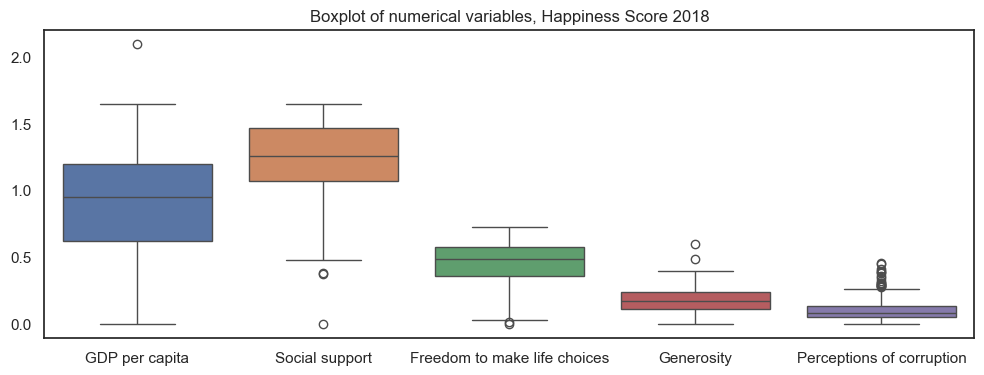

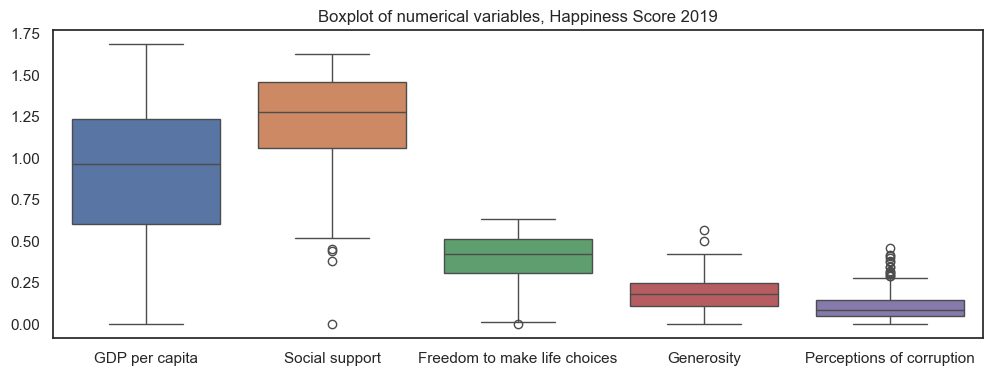

In [24]:
# Boxplots
plt.figure(figsize=(12, 4))
boxplots = sns.boxplot(data=happiness_score_2018[columns_to_describe])
plt.title('Boxplot of numerical variables, Happiness Score 2018')
plt.show()
plt.figure(figsize=(12, 4))
boxplots = sns.boxplot(data=happiness_score_2019[columns_to_describe])
plt.title('Boxplot of numerical variables, Happiness Score 2019')
plt.show()

In [25]:
# Individual boxplots
colors = ['Blue', 'Red', 'Green', 'Purple', 'Orange']  

for idx, i in enumerate(columns_to_describe):
    sns.boxplot(data=happiness_score_2018[i], color=colors[idx % len(colors)]) 
    plt.title('Boxplot of ' + i + ', Happiness Score 2018')
    plt.savefig(f'boxplot_{i}_2018.png', format='png')
    plt.close() 

    sns.boxplot(data=happiness_score_2019[i], color=colors[idx % len(colors)])  
    plt.title('Boxplot of ' + i + ', Happiness Score 2019')
    plt.savefig(f'boxplot_{i}_2019.png', format='png')
    plt.close()  

In [26]:
# Find outliers 2018
for i in columns_to_describe:
    Q1 = happiness_score_2018[i].quantile(0.25)
    Q3 = happiness_score_2018[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = happiness_score_2018[(happiness_score_2018[i] < (Q1 - 1.5 * IQR)) | (happiness_score_2018[i] > (Q3 + 1.5 * IQR))]
    print (i) 
    print('Mean value:', happiness_score_2018[i].mean())
    print(outliers.loc[:, ['Overall rank', 'Country or region', i]])
    print('----------')
    

GDP per capita
Mean value: 0.8914487179487179
     Overall rank     Country or region  GDP per capita
311            20  United Arab Emirates           2.096
----------
Social support
Mean value: 1.2132371794871795
     Overall rank         Country or region  Social support
59            155  Central African Republic           0.000
122           136                     Benin           0.372
238           150                     Syria           0.382
----------
Freedom to make life choices
Mean value: 0.4545064102564103
     Overall rank Country or region  Freedom to make life choices
109           142            Angola                         0.000
154           137             Sudan                         0.016
----------
Generosity
Mean value: 0.18100641025641026
     Overall rank Country or region  Generosity
16             96         Indonesia       0.484
265           130           Myanmar       0.598
----------
Perceptions of corruption
Mean value: 0.11200000000000002
     Over

In [27]:
#outliers 2019
for i in columns_to_describe:
    Q1 = happiness_score_2019[i].quantile(0.25)
    Q3 = happiness_score_2019[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = happiness_score_2019[(happiness_score_2019[i] < (Q1 - 1.5 * IQR)) | (happiness_score_2019[i] > (Q3 + 1.5 * IQR))]
    print (i) 
    print('Mean value:', happiness_score_2019[i].mean())
    print(outliers.loc[:, ['Overall rank', 'Country or region', i]])
    print('----------')

GDP per capita
Mean value: 0.9051474358974357
Empty DataFrame
Columns: [Overall rank, Country or region, GDP per capita]
Index: []
----------
Social support
Mean value: 1.2088141025641026
     Overall rank         Country or region  Social support
54            155  Central African Republic           0.000
156           102                     Benin           0.437
233           149                     Syria           0.378
266           145                   Burundi           0.447
----------
Freedom to make life choices
Mean value: 0.3925705128205128
    Overall rank Country or region  Freedom to make life choices
26           154       Afghanistan                           0.0
----------
Generosity
Mean value: 0.18484615384615383
     Overall rank Country or region  Generosity
35             92         Indonesia       0.498
260           131           Myanmar       0.566
----------
Perceptions of corruption
Mean value: 0.11060256410256408
     Overall rank Country or region  Percept

In [28]:
# Histograms
colors = ['Blue', 'Red', 'Green', 'Purple', 'Orange']

for idx, i in enumerate(columns_to_describe):
    sns.histplot(happiness_score_2018[i], bins=30, kde=True, color=colors[idx % len(colors)])  
    plt.title('Histogram showing distribution of ' + i + ' values 2018')
    plt.savefig(f'histplot_{i}_2018.png', format='png')
    plt.close()  

    sns.histplot(data=happiness_score_2019[i], bins=30, kde=True, color=colors[idx % len(colors)])  
    plt.title('Histogram showing distribution of ' + i + ', values 2019')
    plt.savefig(f'histplot_{i}_2019.png', format='png')
    plt.close()

In [29]:
# Perform Shapiro-Wilk test
from scipy import stats
stat, p = stats.shapiro(happiness_score_2018['GDP per capita'])
# Print results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p}")
# Interpretation
alpha = 0.05
if p > alpha:
    print("Fail to reject H0: Data appears to be normally distributed.")
else:
    print("Reject H0: Data does not appear to be normally distributed.")

Shapiro-Wilk Test Statistic: 0.9783647566293384
P-value: 0.014863139765569158
Reject H0: Data does not appear to be normally distributed.


In [30]:
#Score map 2018
px.choropleth(happiness_score_2018, 
              locations='Country or region', # specifies the column in your DataFrame that contains the country
              locationmode='country names', # indicates that the locations parameter contains country names
              color='Score',
              color_continuous_scale=[(0, 'cornsilk'), (0.5, 'lightseagreen'), (1, 'darkblue')] ) #ISO

In [31]:
#Score map 2019
px.choropleth(happiness_score_2019, 
              locations='Country or region', # specifies the column in your DataFrame that contains the country
              locationmode='country names', # indicates that the locations parameter contains country names
              color='Score',
              color_continuous_scale=[(0, 'cornsilk'), (0.5, 'lightseagreen'), (1, 'darkblue')]) #ISO 

4. Bivariate Analysis (Two Variable Analysis)
* Explore relationships between two variables.
* Use scatter plots (numerical vs. numerical).
* Use correlation analysis (e.g., Pearson correlation).
* Use bar charts or boxplots for categorical vs. numerical relationships.

In [32]:
# Remove outliers 2018
for i in columns_to_describe:
    Q1 = happiness_score_2018[i].quantile(0.25)
    Q3 = happiness_score_2018[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    no_outliers_2018 = happiness_score_2018[
        (happiness_score_2018[i] >= lower_bound) & (happiness_score_2018[i] <= upper_bound)
    ]

In [33]:
#Remove outliers 2019
for i in columns_to_describe:
    Q1 = happiness_score_2019[i].quantile(0.25)
    Q3 = happiness_score_2019[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    no_outliers_2019 = happiness_score_2019[
        (happiness_score_2019[i] >= lower_bound) & (happiness_score_2019[i] <= upper_bound)
    ]

In [34]:
#Scatter plot rank, year & variable
happiness_score['year cat'] = happiness_score['year'].astype('category')
for i in columns_to_describe:
    fig = px.scatter(happiness_score, x='Overall rank', y=i, color= "year cat" # color is like hue parameter on seaborn
                 , color_discrete_sequence=['darkblue', 'darkcyan']) # custom color scale for visualizations that represent continuous data
    fig.update_layout(title= i + ' and ranking by year')
    fig.show()

In [35]:
#Scatter plot score, year, variable
color_pairs = [
    ['darkblue', 'darkcyan'], 
    ['firebrick', 'darksalmon'],  
    ['darkgreen', 'darkolivegreen'], 
    ['indigo', 'darkmagenta'],  
    ['orange', 'coral'], 
]

# Loop through the columns and assign a different color pair to each graph
for idx, i in enumerate(columns_to_describe):
    color_pair = color_pairs[idx % len(color_pairs)]  # Ensure we cycle through color pairs
    fig = px.scatter(happiness_score, 
                     x='Score', 
                     y=i, 
                     color="year cat",  # 'year cat' determines the color
                     color_discrete_sequence=color_pair, # Apply the unique color pair
                     trendline='ols', trendline_options=dict(log_x=True)
                    ) 
    fig.update_layout(title=f'{i} and score by year', width=800, height=400) 
    fig.show()

In [36]:
#Scatter plot with trend line
color_pairs = [
    ['darkblue', 'darkcyan'], 
    ['firebrick', 'darksalmon'],  
    ['darkgreen', 'darkolivegreen'], 
    ['indigo', 'darkmagenta'],  
    ['orange', 'coral'], 
]

# Loop through the columns and assign a different color pair to each graph
for idx, i in enumerate(columns_to_describe):
    color_pair = color_pairs[idx % len(color_pairs)]  # Ensure we cycle through color pairs
    fig = px.scatter(happiness_score, 
                     x='Score', 
                     y=i, 
                     color='year cat',  # 'year cat' determines the color
                     color_discrete_sequence=color_pair, # Apply the unique color pair
                     trendline='lowess', trendline_options=dict(frac=0.5)
                    ) 
    fig.update_layout(title=f'{i} and score by year', width=800, height=400) 
    fig.show()
    
    

In [37]:
# !pip install ydata-profiling

In [38]:
#from ydata_profiling import ProfileReport
#profile = ProfileReport(happiness_score, explorative=True)
#profile.to_file("report.html")

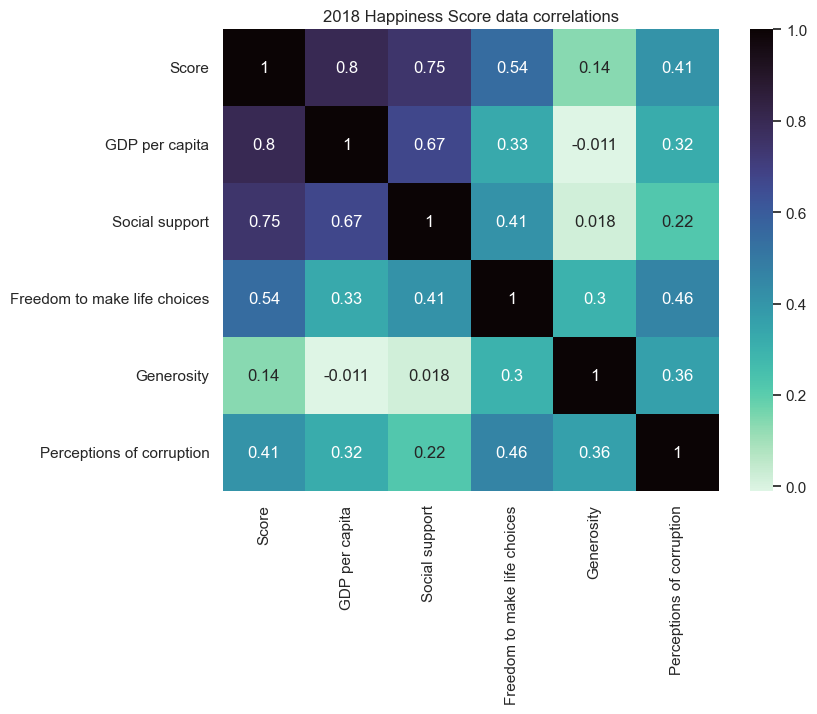

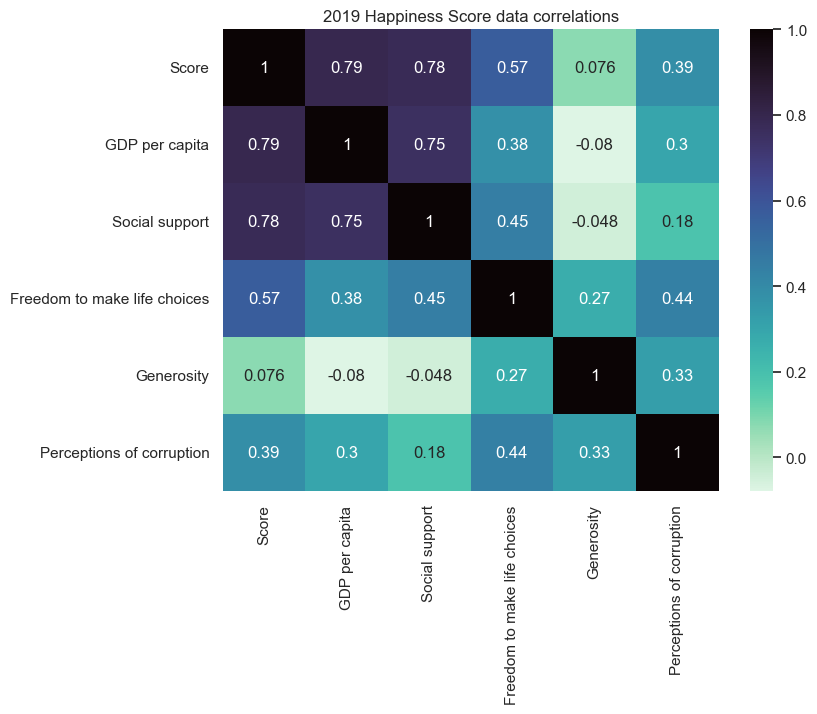

In [39]:
# heatmaps
plt.figure(figsize=(8, 6))
sns.heatmap(happiness_score_2018[['Score'] + columns_to_describe].corr(), annot=True, cmap='mako_r')
plt.title('2018 Happiness Score data correlations')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(happiness_score_2019[['Score'] + columns_to_describe].corr(), annot=True, cmap='mako_r')
plt.title('2019 Happiness Score data correlations')
plt.show()


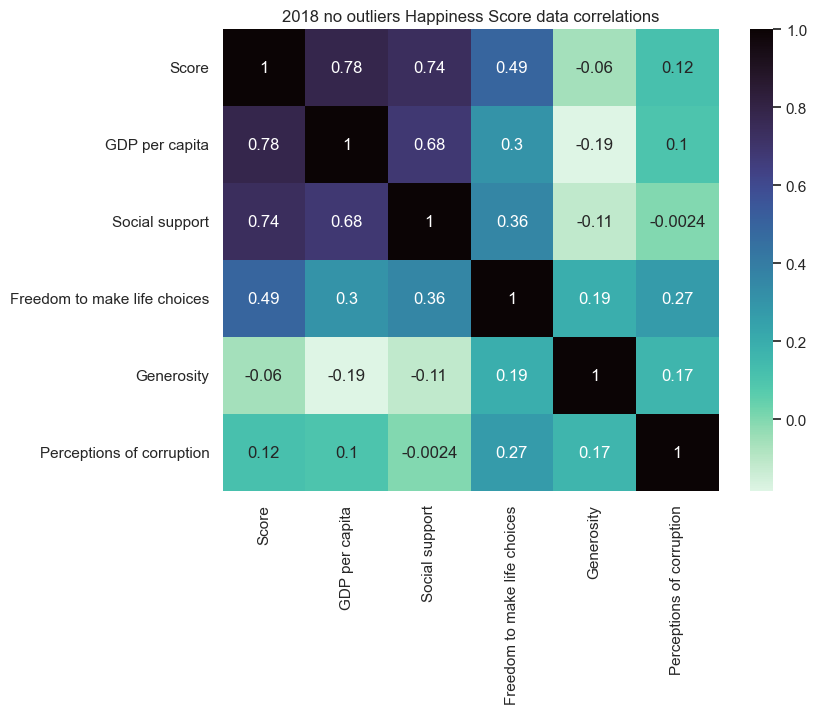

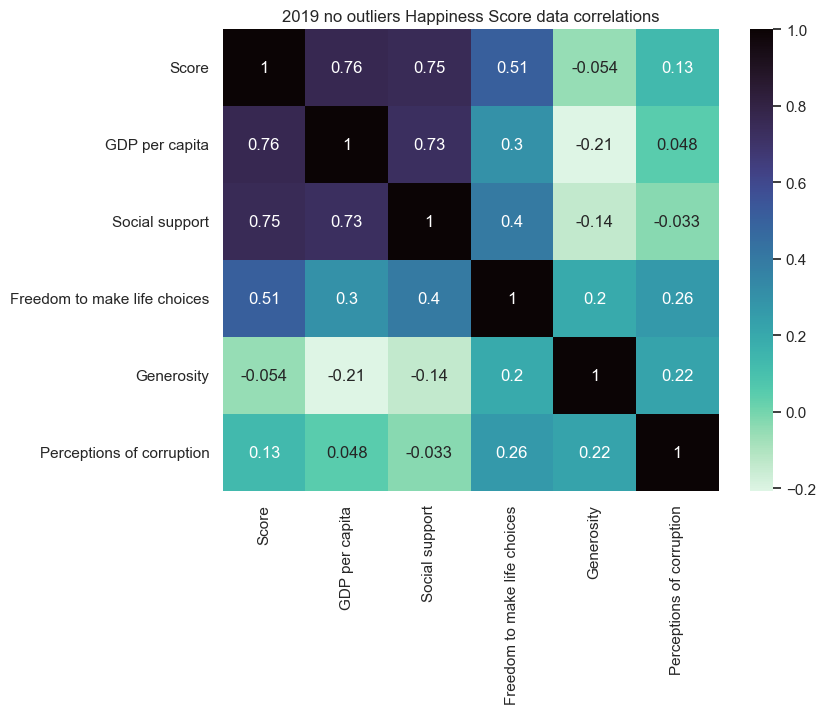

In [40]:
# heatmaps no outliers
plt.figure(figsize=(8, 6))
sns.heatmap(no_outliers_2018[['Score'] + columns_to_describe].corr(), annot=True, cmap='mako_r')
plt.title('2018 no outliers Happiness Score data correlations')
plt.savefig('heatmap no outliers 2018')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(no_outliers_2019[['Score'] + columns_to_describe].corr(), annot=True, cmap='mako_r')
plt.title('2019 no outliers Happiness Score data correlations')
plt.savefig('heatmap no outliers 2019')
plt.show()

5. Multivariate Analysis (Multiple Variable Analysis)
* Study the interactions between multiple variables.
* Use pair plots, heatmaps, or PCA (Principal Component Analysis).
* Identify patterns, clusters, or trends.

In [41]:
#dataframe top 10 and bottom 10 2018 and 2019
top10_2018 = happiness_score_2018.nsmallest(10, 'Overall rank')
bottom10_2018 = happiness_score_2018.nlargest(10, 'Overall rank')
top10_2019 = happiness_score_2019.nsmallest(10, 'Overall rank')
bottom10_2019 = happiness_score_2019.nlargest(10, 'Overall rank')
merged_2018 = pd.concat([top10_2018, bottom10_2018], axis=0, ignore_index=True)
merged_2019 = pd.concat([top10_2019, bottom10_2019], axis=0, ignore_index=True)

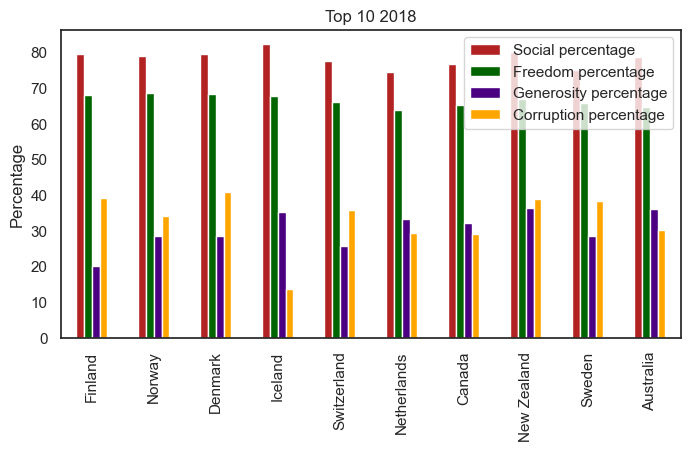

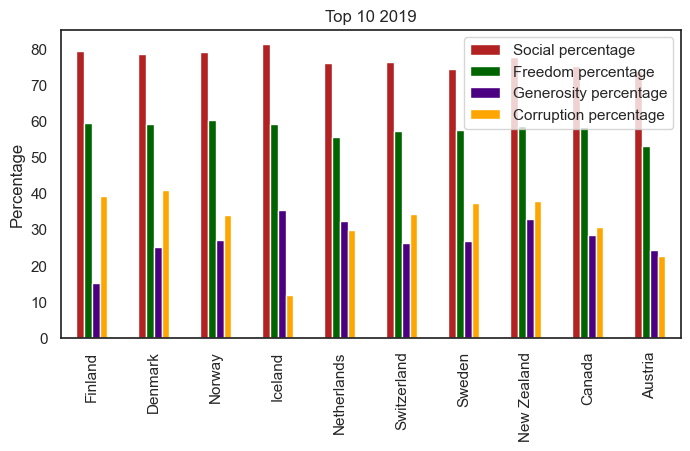

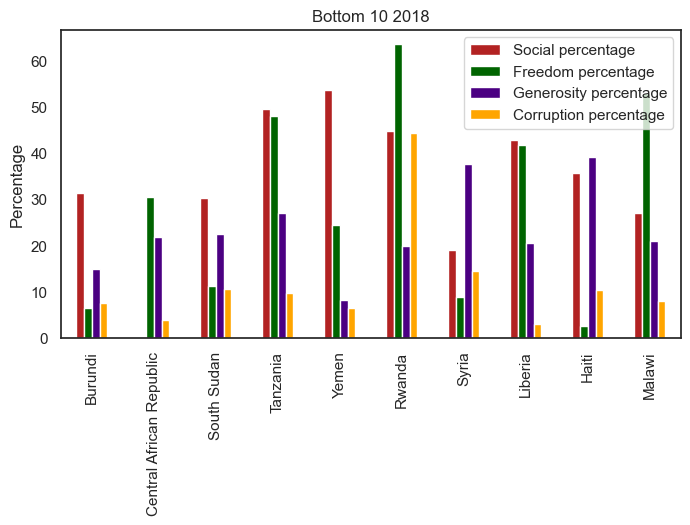

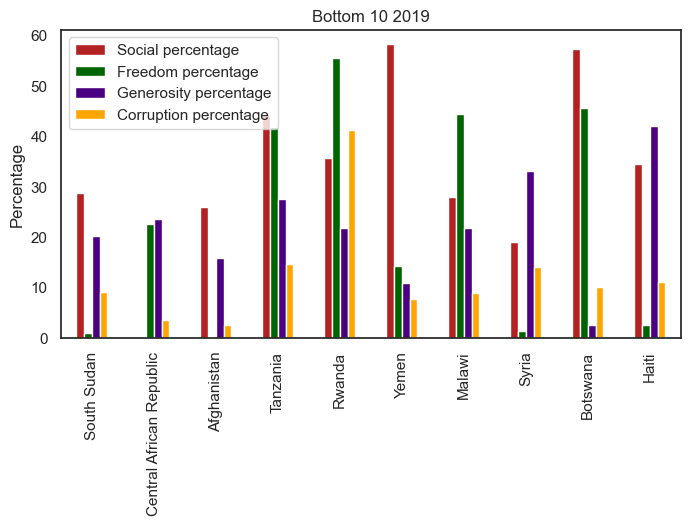

In [42]:
#top and bottom grouped bar graphs
percentage_columns = ['Social percentage', 'Freedom percentage', 'Generosity percentage', 'Corruption percentage']
top10_2018 = top10_2018.reset_index()
top10_2018 = top10_2018.set_index('Country or region')
top10_2018[percentage_columns].plot(kind='bar', stacked=False, 
                                     color=('firebrick', 'darkgreen', 'indigo', 'orange'), 
                                     figsize=(8,4))
plt.xlabel('')
plt.ylabel('Percentage') 
plt.title('Top 10 2018')
plt.show()

top10_2019 = top10_2019.reset_index()
top10_2019 = top10_2019.set_index('Country or region')
top10_2019[percentage_columns].plot(kind='bar', stacked=False, 
                                     color=('firebrick', 'darkgreen', 'indigo', 'orange'), 
                                     figsize=(8,4))
plt.ylabel('Percentage') 
plt.xlabel('')
plt.title('Top 10 2019')
plt.show()

percentage_columns = ['Social percentage', 'Freedom percentage', 'Generosity percentage', 'Corruption percentage']
bottom10_2018 = bottom10_2018.reset_index()
bottom10_2018 = bottom10_2018.set_index('Country or region')
bottom10_2018[percentage_columns].plot(kind='bar', stacked=False, 
                                     color=('firebrick', 'darkgreen', 'indigo', 'orange'), 
                                     figsize=(8,4))
plt.xlabel('')
plt.ylabel('Percentage') 
plt.title('Bottom 10 2018')
plt.show()

bottom10_2019 = bottom10_2019 .reset_index()
bottom10_2019  = bottom10_2019 .set_index('Country or region')
bottom10_2019 [percentage_columns].plot(kind='bar', stacked=False, 
                                     color=('firebrick', 'darkgreen', 'indigo', 'orange'), 
                                     figsize=(8,4))
plt.ylabel('Percentage') 
plt.xlabel('')
plt.title('Bottom 10 2019')
plt.show()

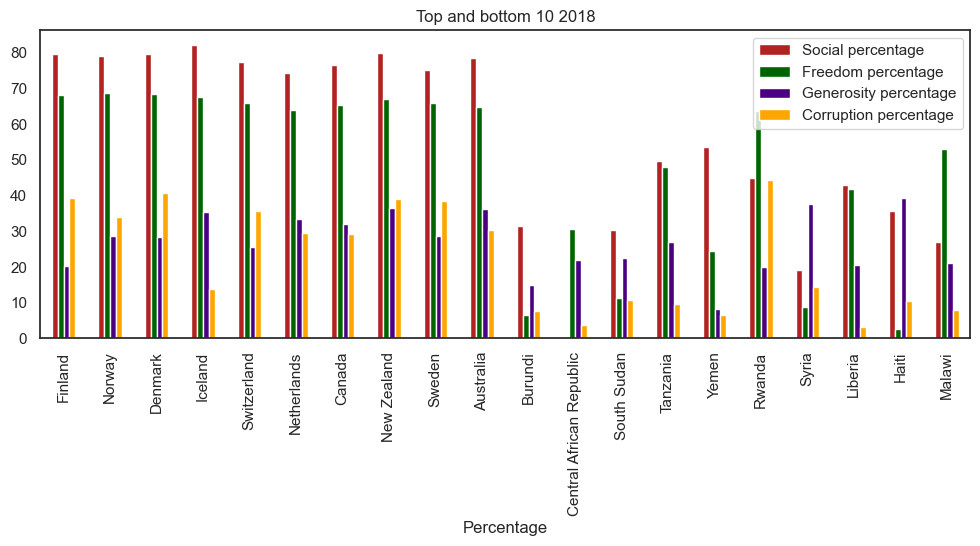

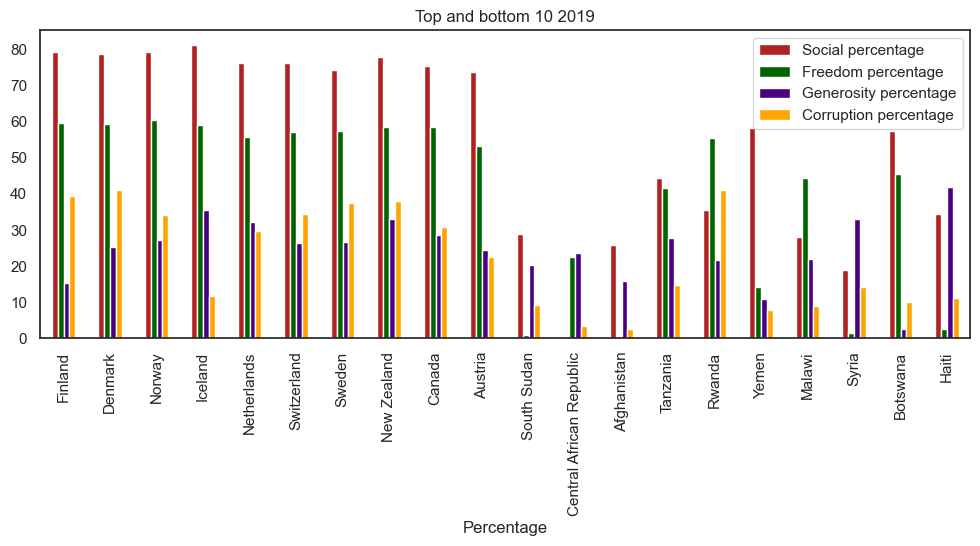

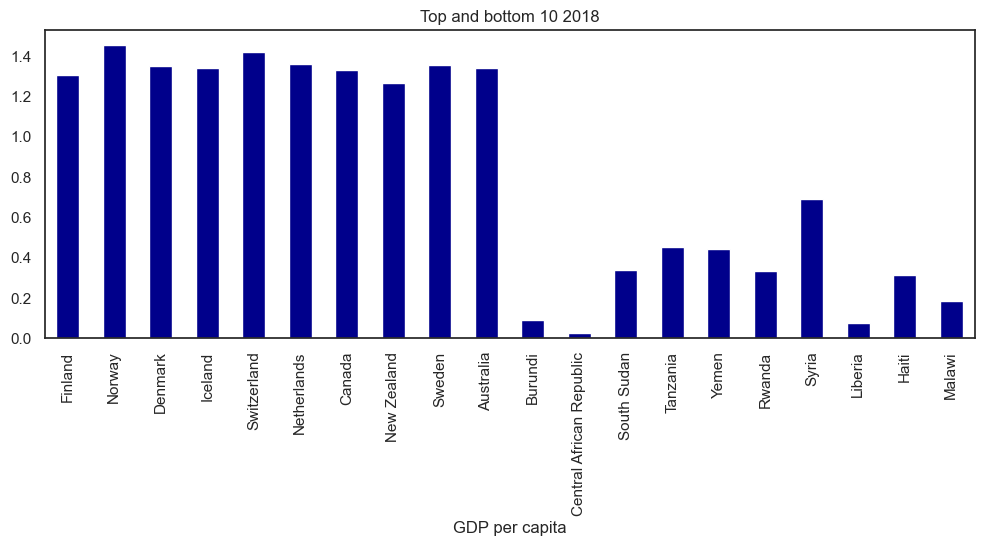

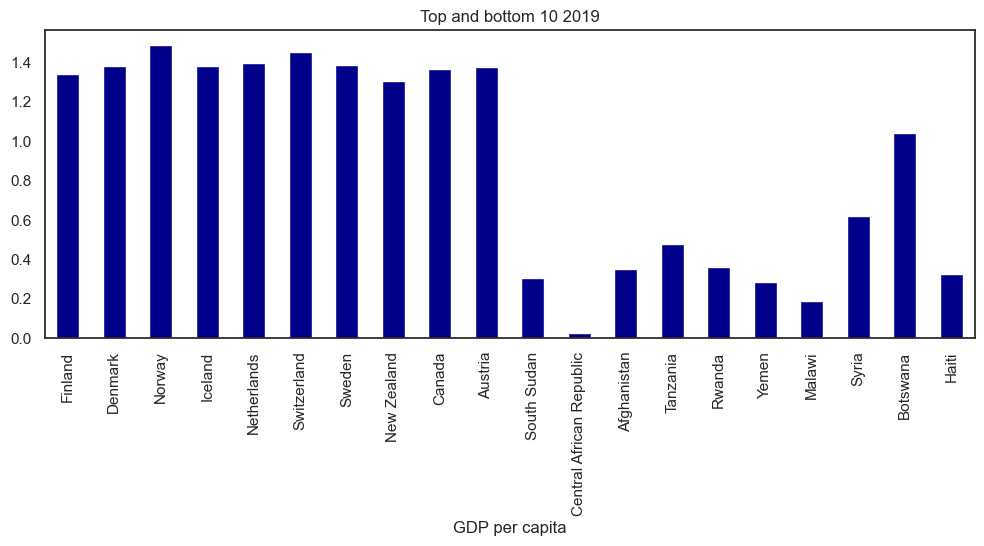

In [79]:
merged_2018 = merged_2018.reset_index()
merged_2018 = merged_2018.set_index('Country or region')
merged_2018[percentage_columns].plot(kind='bar', stacked=False, 
                                     color=('firebrick', 'darkgreen', 'indigo', 'orange'), 
                                     figsize=(12,4))
plt.ylabel('') 
plt.xlabel('Percentage')
plt.title('Top and bottom 10 2018')
plt.show()

merged_2019 = merged_2019.reset_index()
merged_2019 = merged_2019.set_index('Country or region')
merged_2019[percentage_columns].plot(kind='bar', stacked=False, 
                                     color=('firebrick', 'darkgreen', 'indigo', 'orange'), 
                                     figsize=(12,4))
plt.ylabel('') 
plt.xlabel('Percentage')
plt.title('Top and bottom 10 2019')
plt.show()

merged_2018['GDP per capita'].plot(kind='bar', color = 'darkblue', figsize=(12,4))
plt.ylabel('')
plt.xlabel('GDP per capita')
plt.title('Top and bottom 10 2018')
plt.show()

merged_2019['GDP per capita'].plot(kind='bar', color = 'darkblue', figsize=(12,4))
plt.ylabel('')
plt.xlabel('GDP per capita')
plt.title('Top and bottom 10 2019')
plt.show()

In [44]:
#top and bottom 50
top50_2018 = happiness_score_2018.nsmallest(50, 'Overall rank')
bottom50_2018 = happiness_score_2018.nlargest(50, 'Overall rank')
top50_2019 = happiness_score_2019.nsmallest(50, 'Overall rank')
bottom50_2019 = happiness_score_2019.nlargest(50, 'Overall rank')

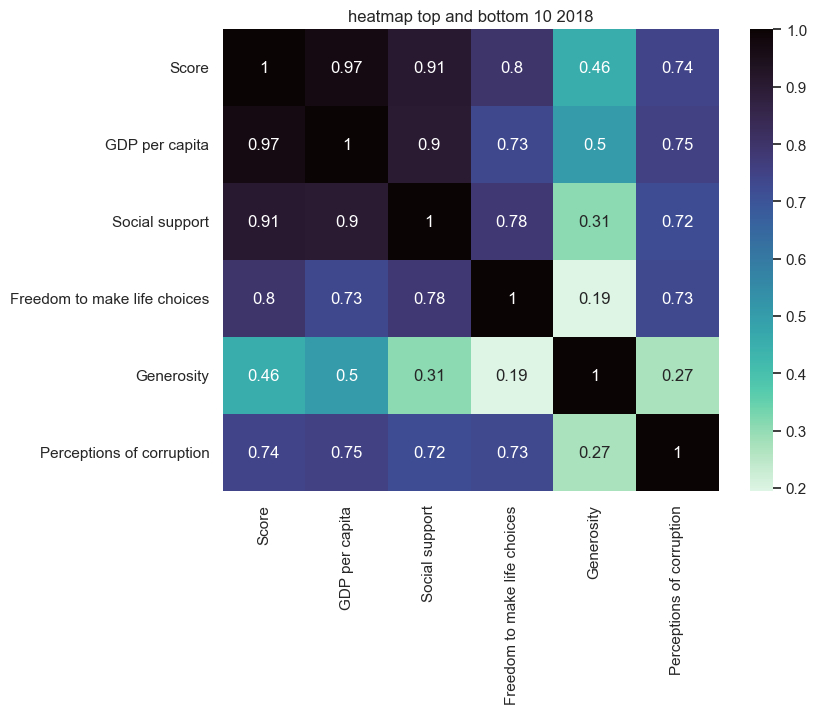

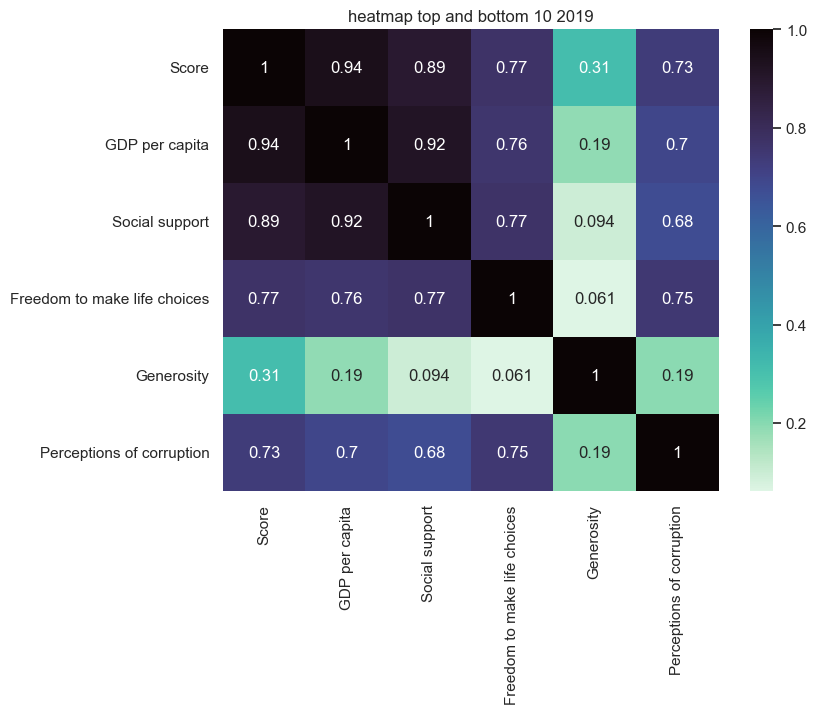

In [45]:
# heatmaps top and bottom 10
plt.figure(figsize=(8, 6))
sns.heatmap(merged_2018[['Score'] + columns_to_describe].corr(), annot=True, cmap='mako_r')
plt.title('heatmap top and bottom 10 2018')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(merged_2019[['Score'] + columns_to_describe].corr(), annot=True, cmap='mako_r')
plt.title('heatmap top and bottom 10 2019')
plt.show()

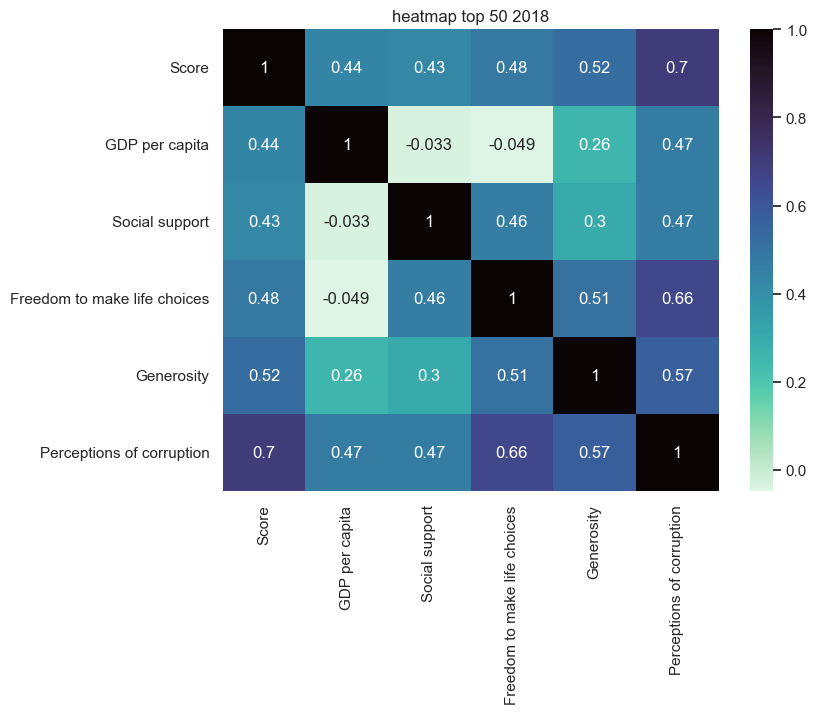

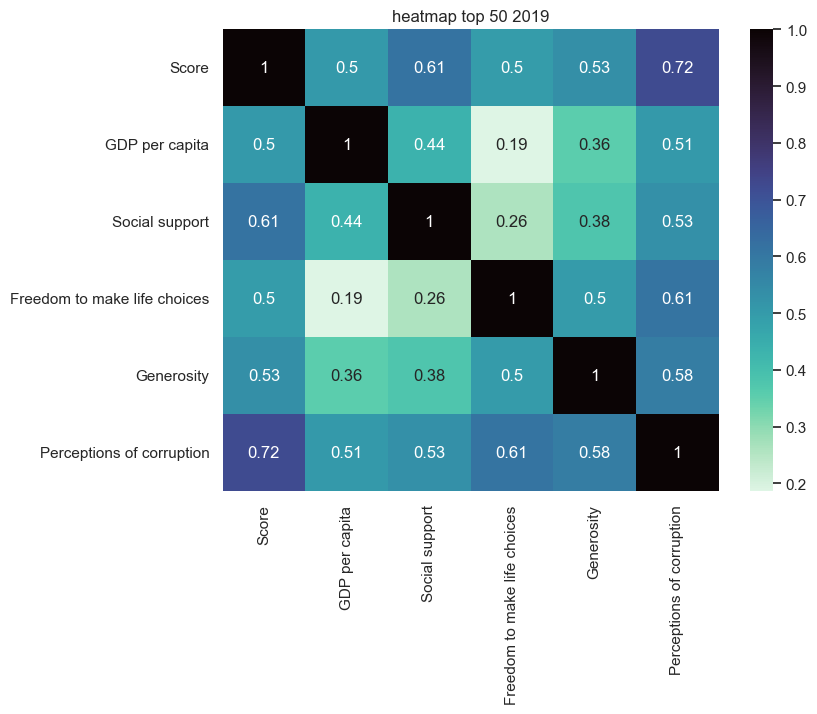

In [46]:
#heatmaps top 50
plt.figure(figsize=(8, 6))
sns.heatmap(top50_2018[['Score'] + columns_to_describe].corr(), annot=True, cmap='mako_r')
plt.title('heatmap top 50 2018')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(top50_2019[['Score'] + columns_to_describe].corr(), annot=True, cmap='mako_r')
plt.title('heatmap top 50 2019')
plt.show()

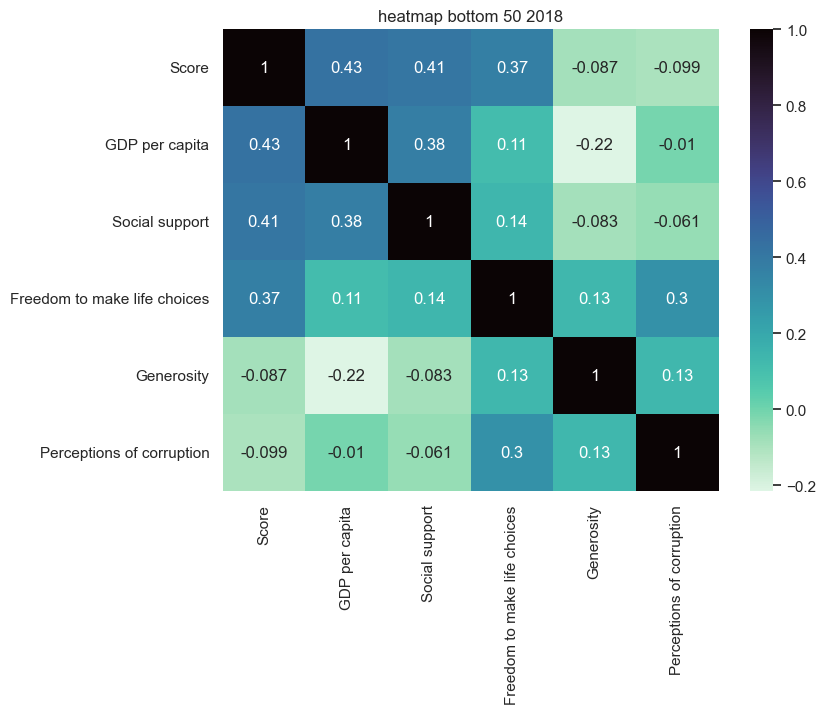

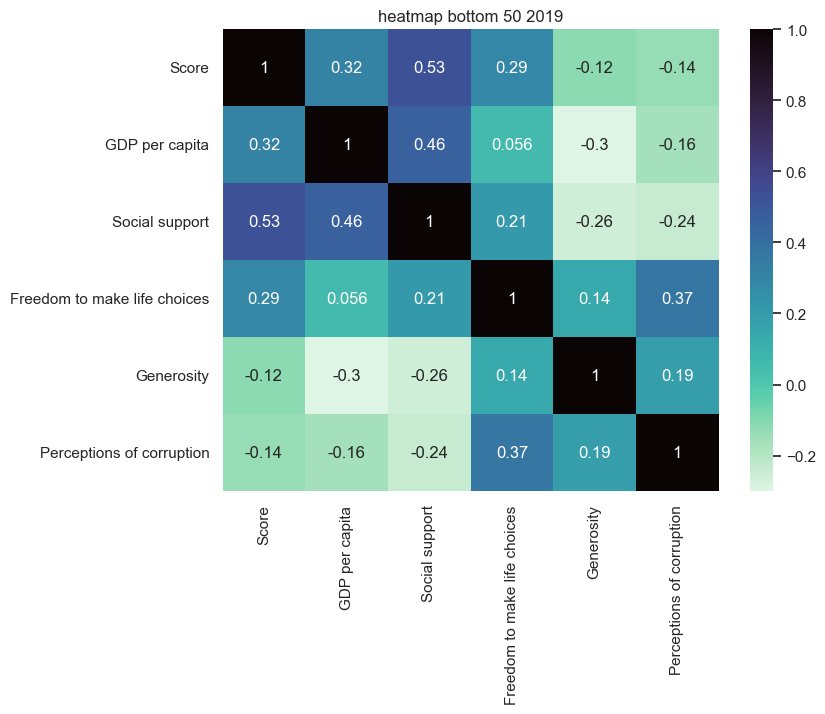

In [47]:
#heatmaps bottom 50
plt.figure(figsize=(8, 6))
sns.heatmap(bottom50_2018[['Score'] + columns_to_describe].corr(), annot=True, cmap='mako_r')
plt.title('heatmap bottom 50 2018')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(bottom50_2019[['Score'] + columns_to_describe].corr(), annot=True, cmap='mako_r')
plt.title('heatmap bottom 50 2019')
plt.show()

In [48]:
#Score map top 50 2019
px.choropleth(top50_2019, 
              locations='Country or region', # specifies the column in your DataFrame that contains the country
              locationmode='country names', # indicates that the locations parameter contains country names
              color='Score',
              color_continuous_scale=[(0, 'cornsilk'), (0.5, 'lightseagreen'), (1, 'darkblue')] ) #ISO

6. Detecting Outliers and Anomalies
* Identify outliers using boxplots, IQR, and Z-scores.
* Use scatter plots and histograms to visualize anomalies.
* Decide whether to remove, transform, or keep outliers.

7. Feature Engineering and Transformation
* Create new variables from existing ones.
* Normalize or standardize data (scaling).
* Encode categorical variables (one-hot encoding, label encoding).
* Reduce dimensionality if necessary.

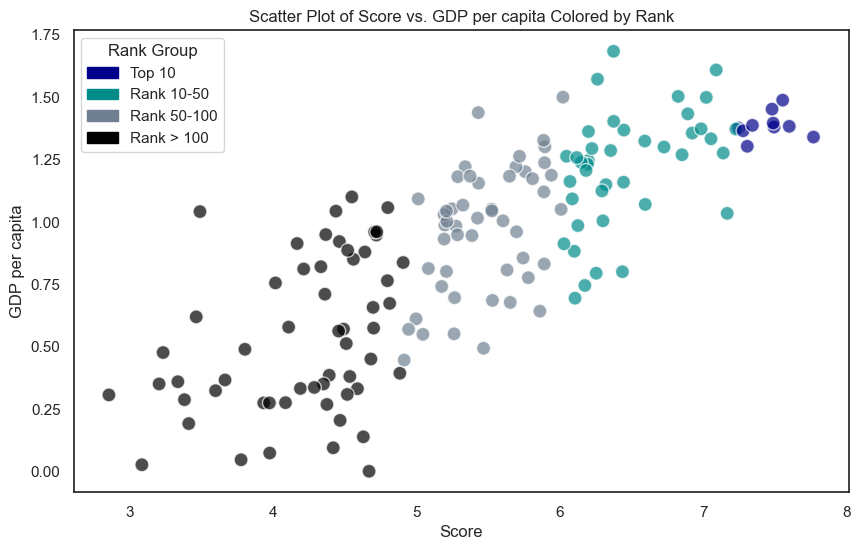

In [80]:
# scatter 2 variables by rank
import matplotlib.patches as mpatches

def rank_to_color(rank):
    if rank <= 10:
        return 'darkblue'
    elif 10 < rank <= 50:
        return 'darkcyan'
    elif 50 < rank <= 100:
        return 'slategrey'
    else:
        return 'black'

# Apply the function to the 'rank' column to create a new 'color' column
happiness_score_2019['color'] = happiness_score_2019['Overall rank'].apply(rank_to_color)

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(happiness_score_2019['Score'], happiness_score_2019['GDP per capita'], c=happiness_score_2019['color'], s=100, edgecolors='w', alpha=0.7)

# Add labels and title
plt.xlabel('Score')
plt.ylabel('GDP per capita')
plt.title('Scatter Plot of Score vs. GDP per capita Colored by Rank')

legend_labels = ['Top 10', 'Rank 10-50', 'Rank 50-100', 'Rank > 100']
legend_colors = ['darkblue', 'darkcyan', 'slategrey', 'black']

# Create the legend handles
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=handles, title='Rank Group')


# Show the plot
plt.show()

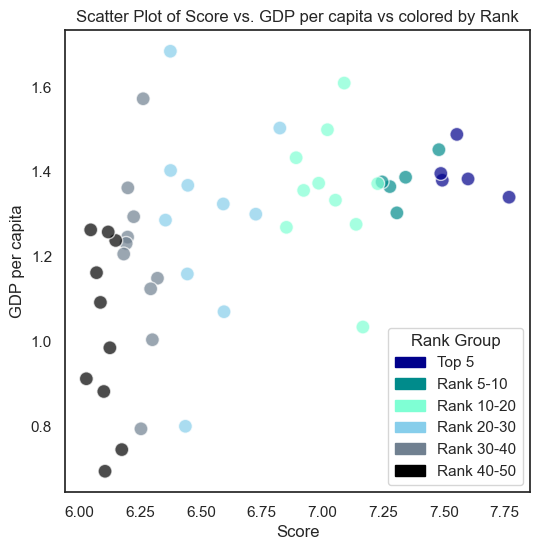

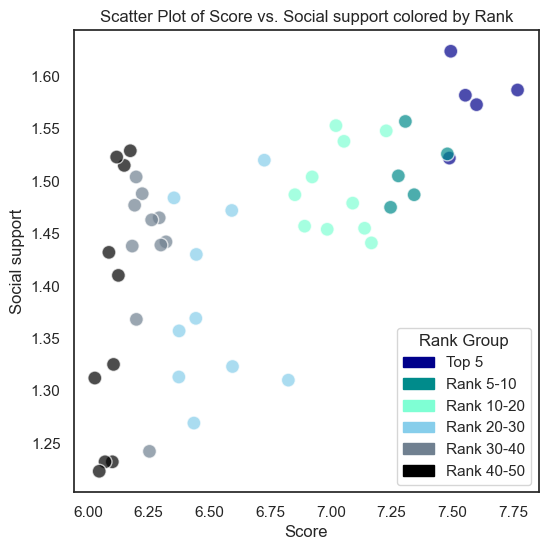

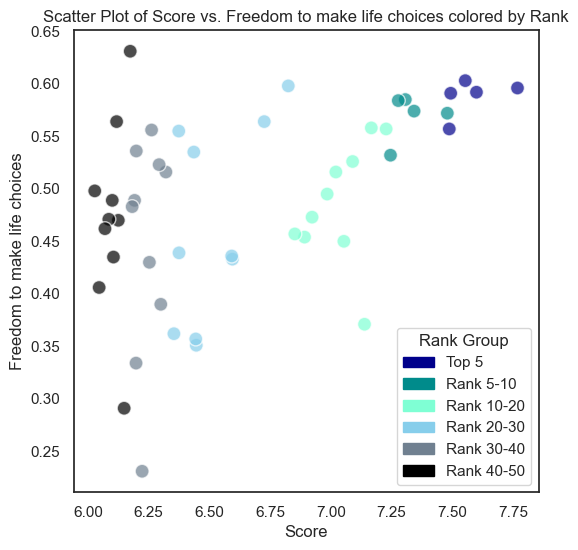

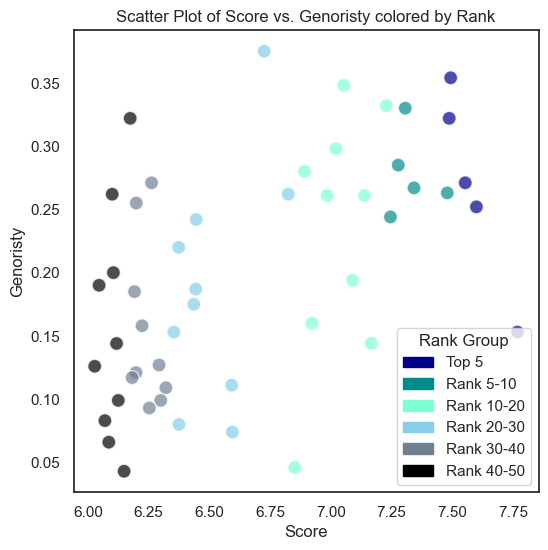

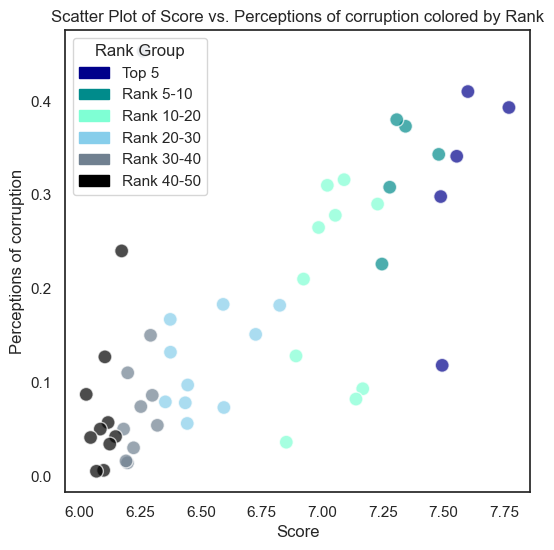

In [50]:
# scatter top 50 - 2 variables by rank
import matplotlib.patches as mpatches

def rank_to_color(rank):
    if rank <= 5:
        return 'darkblue'
    elif 5 < rank <= 10:
        return 'darkcyan'
    elif 10 < rank <= 20:
        return 'aquamarine'
    elif 20 < rank <= 30:
        return 'skyblue'
    elif 30 < rank <= 40:
        return 'slategrey'
    else:
        return 'black'

# Apply the function to the 'rank' column to create a new 'color' column
top50_2019['color'] = top50_2019['Overall rank'].apply(rank_to_color)

# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(top50_2019['Score'], top50_2019['GDP per capita'], c=top50_2019['color'], s=100, edgecolors='w', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('GDP per capita')
plt.title('Scatter Plot of Score vs. GDP per capita vs colored by Rank')
legend_labels = ['Top 5', 'Rank 5-10', 'Rank 10-20', 'Rank 20-30', 'Rank 30-40', 'Rank 40-50']
legend_colors = ['darkblue', 'darkcyan', 'aquamarine', 'skyblue', 'slategrey', 'black']
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, title='Rank Group')
plt.show()


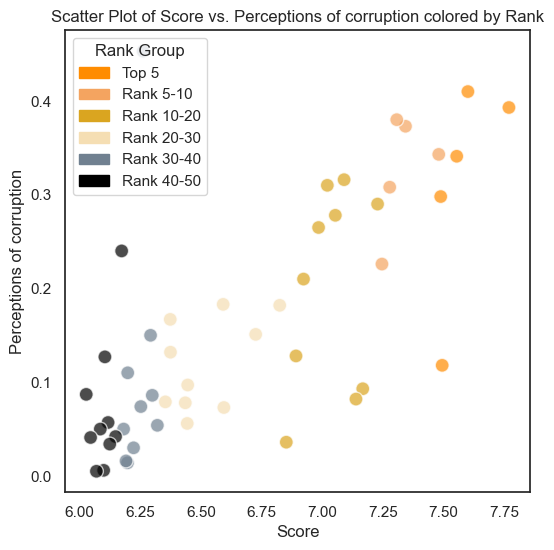

In [77]:
# scatter top 50 - 2 variables by rank
import matplotlib.patches as mpatches

def rank_to_color5(rank):
    if rank <= 5:
        return 'darkorange'
    elif 5 < rank <= 10:
        return 'sandybrown'
    elif 10 < rank <= 20:
        return 'goldenrod'
    elif 20 < rank <= 30:
        return 'wheat'
    elif 30 < rank <= 40:
        return 'slategrey'
    else:
        return 'black'

# Apply the function to the 'rank' column to create a new 'color' column
top50_2019['color5'] = top50_2019['Overall rank'].apply(rank_to_color5)

# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(top50_2019['Score'], top50_2019['Perceptions of corruption'], c=top50_2019['color5'], s=100, edgecolors='w', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Perceptions of corruption')
plt.title('Scatter Plot of Score vs. Perceptions of corruption colored by Rank')
legend_labels = ['Top 5', 'Rank 5-10', 'Rank 10-20', 'Rank 20-30', 'Rank 30-40', 'Rank 40-50']
legend_colors = ['darkorange', 'sandybrown', 'goldenrod', 'wheat', 'slategrey', 'black']
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, title='Rank Group')
plt.show()


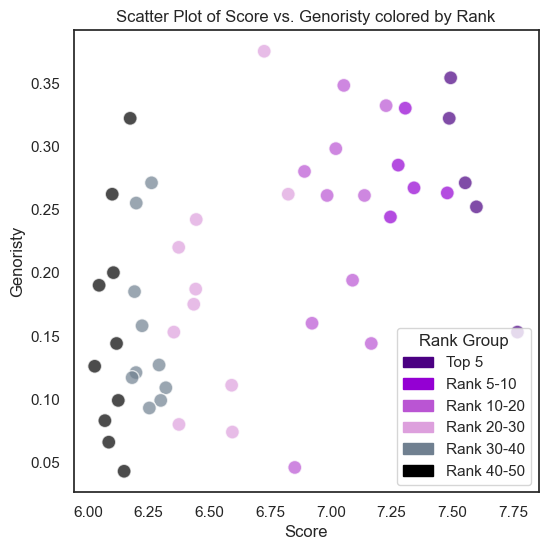

In [74]:
# scatter top 50 - 2 variables by rank
import matplotlib.patches as mpatches

def rank_to_color4(rank):
    if rank <= 5:
        return 'indigo'
    elif 5 < rank <= 10:
        return 'darkviolet'
    elif 10 < rank <= 20:
        return 'mediumorchid'
    elif 20 < rank <= 30:
        return 'plum'
    elif 30 < rank <= 40:
        return 'slategrey'
    else:
        return 'black'

# Apply the function to the 'rank' column to create a new 'color' column
top50_2019['color4'] = top50_2019['Overall rank'].apply(rank_to_color4)

# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(top50_2019['Score'], top50_2019['Generosity'], c=top50_2019['color4'], s=100, edgecolors='w', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Genoristy')
plt.title('Scatter Plot of Score vs. Genoristy colored by Rank')
legend_labels = ['Top 5', 'Rank 5-10', 'Rank 10-20', 'Rank 20-30', 'Rank 30-40', 'Rank 40-50']
legend_colors = ['indigo', 'darkviolet', 'mediumorchid', 'plum', 'slategrey', 'black']
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, title='Rank Group')
plt.show()

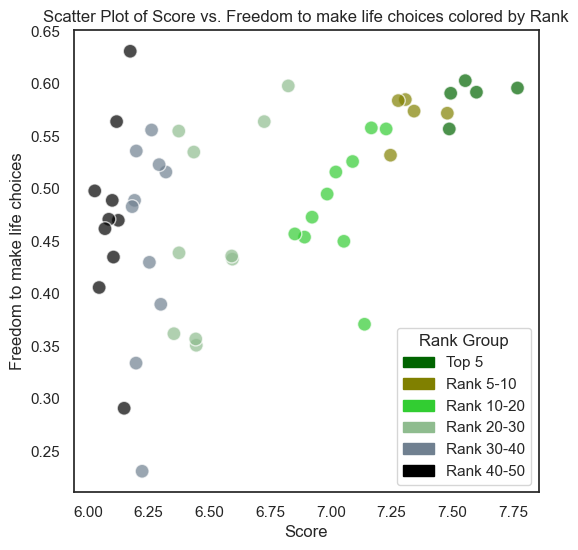

In [73]:
# scatter top 50 - 2 variables by rank
import matplotlib.patches as mpatches

def rank_to_color3(rank):
    if rank <= 5:
        return 'darkgreen'
    elif 5 < rank <= 10:
        return 'olive'
    elif 10 < rank <= 20:
        return 'limegreen'
    elif 20 < rank <= 30:
        return 'darkseagreen'
    elif 30 < rank <= 40:
        return 'slategrey'
    else:
        return 'black'

# Apply the function to the 'rank' column to create a new 'color' column
top50_2019['color3'] = top50_2019['Overall rank'].apply(rank_to_color3)

# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(top50_2019['Score'], top50_2019['Freedom to make life choices'], c=top50_2019['color3'], s=100, edgecolors='w', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Freedom to make life choices')
plt.title('Scatter Plot of Score vs. Freedom to make life choices colored by Rank')
legend_labels = ['Top 5', 'Rank 5-10', 'Rank 10-20', 'Rank 20-30', 'Rank 30-40', 'Rank 40-50']
legend_colors = ['darkgreen', 'olive', 'limegreen', 'darkseagreen', 'slategrey', 'black']
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, title='Rank Group')
plt.show()


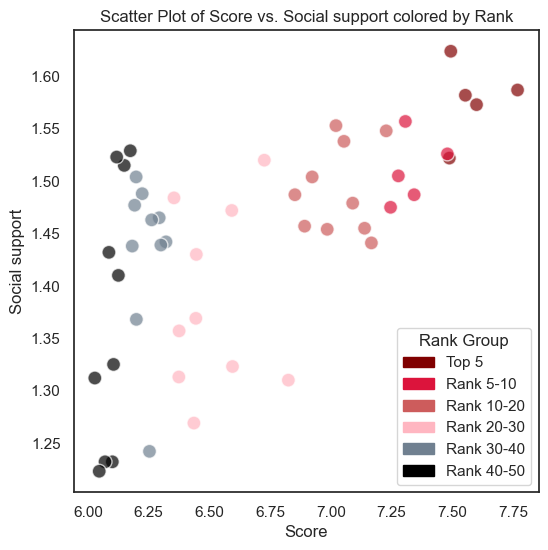

In [71]:
# scatter top 50 - 2 variables by rank
import matplotlib.patches as mpatches

def rank_to_color2(rank):
    if rank <= 5:
        return 'maroon'
    elif 5 < rank <= 10:
        return 'crimson'
    elif 10 < rank <= 20:
        return 'indianred'
    elif 20 < rank <= 30:
        return 'lightpink'
    elif 30 < rank <= 40:
        return 'slategrey'
    else:
        return 'black'

# Apply the function to the 'rank' column to create a new 'color' column
top50_2019['color2'] = top50_2019['Overall rank'].apply(rank_to_color2)

# Create the scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(top50_2019['Score'], top50_2019['Social support'], c=top50_2019['color2'], s=100, edgecolors='w', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Social support')
plt.title('Scatter Plot of Score vs. Social support colored by Rank')
legend_labels = ['Top 5', 'Rank 5-10', 'Rank 10-20', 'Rank 20-30', 'Rank 30-40', 'Rank 40-50']
legend_colors = ['maroon', 'crimson', 'indianred', 'lightpink', 'slategrey', 'black']
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=handles, title='Rank Group')
plt.show()


In [52]:
# import fragile states index 2019 data
fsi = pd.read_csv('../_bi_moduleProjects/fsi2019.csv')

In [53]:
fsi.head()

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Yemen,2019,1st,113.5,10.0,10.0,9.6,9.7,8.1,7.3,9.8,9.8,9.9,9.7,9.6,10.0,0.8
1,Somalia,2019,2nd,112.3,9.6,10.0,8.9,8.8,9.4,9.2,9.0,9.4,9.3,10.0,9.4,9.2,-0.9
2,South Sudan,2019,3rd,112.2,9.7,9.7,9.4,9.8,8.9,6.5,10.0,9.8,9.3,9.7,10.0,9.4,-1.2
3,Syria,2019,4th,111.5,9.8,9.9,10.0,8.8,7.5,8.4,9.9,9.4,10.0,7.9,10.0,10.0,0.1
4,Congo Democratic Republic,2019,5th,110.2,8.8,9.8,10.0,8.3,8.6,7.0,9.4,9.2,9.6,9.8,10.0,9.7,-0.5


In [54]:
#change rank to int
fsi['Rank'] = fsi['Rank'].str.extract('(\d+)').astype(int)
fsi.head()

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Yemen,2019,1,113.5,10.0,10.0,9.6,9.7,8.1,7.3,9.8,9.8,9.9,9.7,9.6,10.0,0.8
1,Somalia,2019,2,112.3,9.6,10.0,8.9,8.8,9.4,9.2,9.0,9.4,9.3,10.0,9.4,9.2,-0.9
2,South Sudan,2019,3,112.2,9.7,9.7,9.4,9.8,8.9,6.5,10.0,9.8,9.3,9.7,10.0,9.4,-1.2
3,Syria,2019,4,111.5,9.8,9.9,10.0,8.8,7.5,8.4,9.9,9.4,10.0,7.9,10.0,10.0,0.1
4,Congo Democratic Republic,2019,5,110.2,8.8,9.8,10.0,8.3,8.6,7.0,9.4,9.2,9.6,9.8,10.0,9.7,-0.5


In [55]:
fsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           178 non-null    object 
 1   Year                              178 non-null    int64  
 2   Rank                              178 non-null    int64  
 3   Total                             178 non-null    float64
 4   C1: Security Apparatus            178 non-null    float64
 5   C2: Factionalized Elites          178 non-null    float64
 6   C3: Group Grievance               178 non-null    float64
 7   E1: Economy                       178 non-null    float64
 8   E2: Economic Inequality           178 non-null    float64
 9   E3: Human Flight and Brain Drain  178 non-null    float64
 10  P1: State Legitimacy              178 non-null    float64
 11  P2: Public Services               178 non-null    float64
 12  P3: Huma

In [56]:
#merge the dfs
df_merged = happiness_score_2019.merge(fsi, left_on='Country or region', right_on='Country', how='left')
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Overall rank                      156 non-null    int64  
 1   Country or region                 156 non-null    object 
 2   Score                             156 non-null    float64
 3   GDP per capita                    156 non-null    float64
 4   Social support                    156 non-null    float64
 5   Freedom to make life choices      156 non-null    float64
 6   Generosity                        156 non-null    float64
 7   Perceptions of corruption         156 non-null    float64
 8   year                              156 non-null    int64  
 9   Social percentage                 156 non-null    float64
 10  Freedom percentage                156 non-null    float64
 11  Generosity percentage             156 non-null    float64
 12  Corrupti

In [57]:
np.sort(fsi['Country'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo Democratic Republic', 'Congo Republic',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Hait

In [58]:
df_merged[df_merged['Country'].isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Social percentage,...,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
3,46,Kosovo,6.100,0.882,1.232,0.489,0.262,0.006,2019,61.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,38,Slovakia,6.198,1.246,1.504,0.334,0.121,0.014,2019,75.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,39,Trinidad & Tobago,6.192,1.231,1.477,0.489,0.185,0.016,2019,73.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,86,Kyrgyzstan,5.261,0.551,1.438,0.508,0.300,0.023,2019,71.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,84,North Macedonia,5.274,0.983,1.294,0.345,0.185,0.034,2019,64.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,20,Czech Republic,6.852,1.269,1.487,0.457,0.046,0.036,2019,74.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,127,Congo (Kinshasa),4.418,0.094,1.125,0.269,0.212,0.053,2019,56.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,110,Palestinian Territories,4.696,0.657,1.247,0.225,0.103,0.066,2019,62.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,13,Israel,7.139,1.276,1.455,0.371,0.261,0.082,2019,72.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,99,Ivory Coast,4.944,0.569,0.808,0.352,0.154,0.090,2019,40.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
happiness_score[happiness_score['Country or region'].str.contains('Macedonia', case=False, na=False)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Social percentage,Freedom percentage,Generosity percentage,Corruption percentage,year cat
51,84,North Macedonia,5.274,0.983,1.294,0.345,0.185,0.034,2019,64.70,34.5,18.5,3.4,2019
82,89,Macedonia,5.185,0.959,1.239,0.394,0.173,0.052,2018,61.95,39.4,17.3,5.2,2018


In [60]:
happiness_score[happiness_score['Country or region'].str.contains('Cyprus', case=False, na=False)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Social percentage,Freedom percentage,Generosity percentage,Corruption percentage,year cat
52,61,Cyprus,5.762,1.229,1.191,0.423,0.202,0.035,2018,59.55,42.3,20.2,3.5,2018
65,49,Cyprus,6.046,1.263,1.223,0.406,0.190,0.041,2019,61.15,40.6,19.0,4.1,2019
247,58,Northern Cyprus,5.835,1.229,1.211,0.495,0.179,0.154,2018,60.55,49.5,17.9,15.4,2018
252,64,Northern Cyprus,5.718,1.263,1.252,0.417,0.191,0.162,2019,62.60,41.7,19.1,16.2,2019


In [61]:
#create copy for new country names
fsi_clean = fsi
fsi_clean.head()

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Yemen,2019,1,113.5,10.0,10.0,9.6,9.7,8.1,7.3,9.8,9.8,9.9,9.7,9.6,10.0,0.8
1,Somalia,2019,2,112.3,9.6,10.0,8.9,8.8,9.4,9.2,9.0,9.4,9.3,10.0,9.4,9.2,-0.9
2,South Sudan,2019,3,112.2,9.7,9.7,9.4,9.8,8.9,6.5,10.0,9.8,9.3,9.7,10.0,9.4,-1.2
3,Syria,2019,4,111.5,9.8,9.9,10.0,8.8,7.5,8.4,9.9,9.4,10.0,7.9,10.0,10.0,0.1
4,Congo Democratic Republic,2019,5,110.2,8.8,9.8,10.0,8.3,8.6,7.0,9.4,9.2,9.6,9.8,10.0,9.7,-0.5


In [62]:
# change names of missing countries
fsi_clean.loc[fsi_clean['Country'] == 'Slovak Republic', 'Country'] = 'Slovakia'
fsi_clean.loc[fsi_clean['Country'] == 'Trinidad and Tobago', 'Country'] = 'Trinidad & Tobago'
fsi_clean.loc[fsi_clean['Country'] == 'Kyrgyz Republic', 'Country'] = 'Kyrgyzstan'
fsi_clean.loc[fsi_clean['Country'] == 'Macedonia', 'Country'] = 'North Macedonia'
fsi_clean.loc[fsi_clean['Country'] == 'Czechia', 'Country'] = 'Czech Republic'
fsi_clean.loc[fsi_clean['Country'] == 'Congo Democratic Republic', 'Country'] = 'Congo (Kinshasa)'
fsi_clean.loc[fsi_clean['Country'] == 'Israel and West Bank', 'Country'] = 'Israel'
fsi_clean.loc[fsi_clean['Country'] == "Cote d'Ivoire", 'Country'] = "Ivory Coast"
fsi_clean.loc[fsi_clean['Country'] == 'Congo Republic', 'Country'] = 'Congo (Brazzaville)'
fsi_clean.loc[fsi_clean['Country'] == 'Eswatini', 'Country'] = 'Swaziland'

In [63]:
#merge the dfs with more matching country names
happiness_and_fsi = happiness_score_2019.merge(fsi, left_on='Country or region', right_on='Country', how='left')
happiness_and_fsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Overall rank                      156 non-null    int64  
 1   Country or region                 156 non-null    object 
 2   Score                             156 non-null    float64
 3   GDP per capita                    156 non-null    float64
 4   Social support                    156 non-null    float64
 5   Freedom to make life choices      156 non-null    float64
 6   Generosity                        156 non-null    float64
 7   Perceptions of corruption         156 non-null    float64
 8   year                              156 non-null    int64  
 9   Social percentage                 156 non-null    float64
 10  Freedom percentage                156 non-null    float64
 11  Generosity percentage             156 non-null    float64
 12  Corrupti

In [64]:
happiness_and_fsi = happiness_and_fsi.rename(columns={'Overall rank': 'Happiness Rank', 'Rank': 'FSI Rank'})
happiness_and_fsi.head()

,Happiness Rank,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year,Social percentage,...,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,71,Moldova,5.529,0.685,1.328,0.245,0.181,0.000,2019,66.40,...,5.8,4.2,6.7,6.3,4.5,4.6,4.2,3.3,6.8,-2.4
1,97,Bulgaria,5.011,1.092,1.513,0.311,0.081,0.004,2019,75.65,...,5.2,3.8,4.2,3.9,3.8,3.2,3.5,4.3,4.3,-1.0
2,48,Romania,6.070,1.162,1.232,0.462,0.083,0.005,2019,61.60,...,4.4,3.6,4.5,5.6,3.4,3.5,2.6,2.3,3.6,-1.5
3,46,Kosovo,6.100,0.882,1.232,0.489,0.262,0.006,2019,61.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,Bosnia and Herzegovina,5.386,0.945,1.212,0.212,0.263,0.006,2019,60.60,...,6.2,4.7,5.9,6.3,3.1,5.0,3.4,7.2,8.2,0.0


In [65]:
rankcomparison = px.scatter(happiness_and_fsi, x='Happiness Rank', y='FSI Rank', trendline='lowess', trendline_options=dict(frac=0.5)) 
rankcomparison.update_layout(title= 'Happiness Ranking vs. Fragile State Ranking (2019)')
rankcomparison.show()

In [66]:
happiness_and_fsi.columns

Index(['Happiness Rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year', 'Social percentage',
       'Freedom percentage', 'Generosity percentage', 'Corruption percentage',
       'color', 'Country', 'Year', 'FSI Rank', 'Total',
       'C1: Security Apparatus', 'C2: Factionalized Elites',
       'C3: Group Grievance', 'E1: Economy', 'E2: Economic Inequality',
       'E3: Human Flight and Brain Drain', 'P1: State Legitimacy',
       'P2: Public Services', 'P3: Human Rights', 'S1: Demographic Pressures',
       'S2: Refugees and IDPs', 'X1: External Intervention',
       'Change from Previous Year'],
      dtype='object')

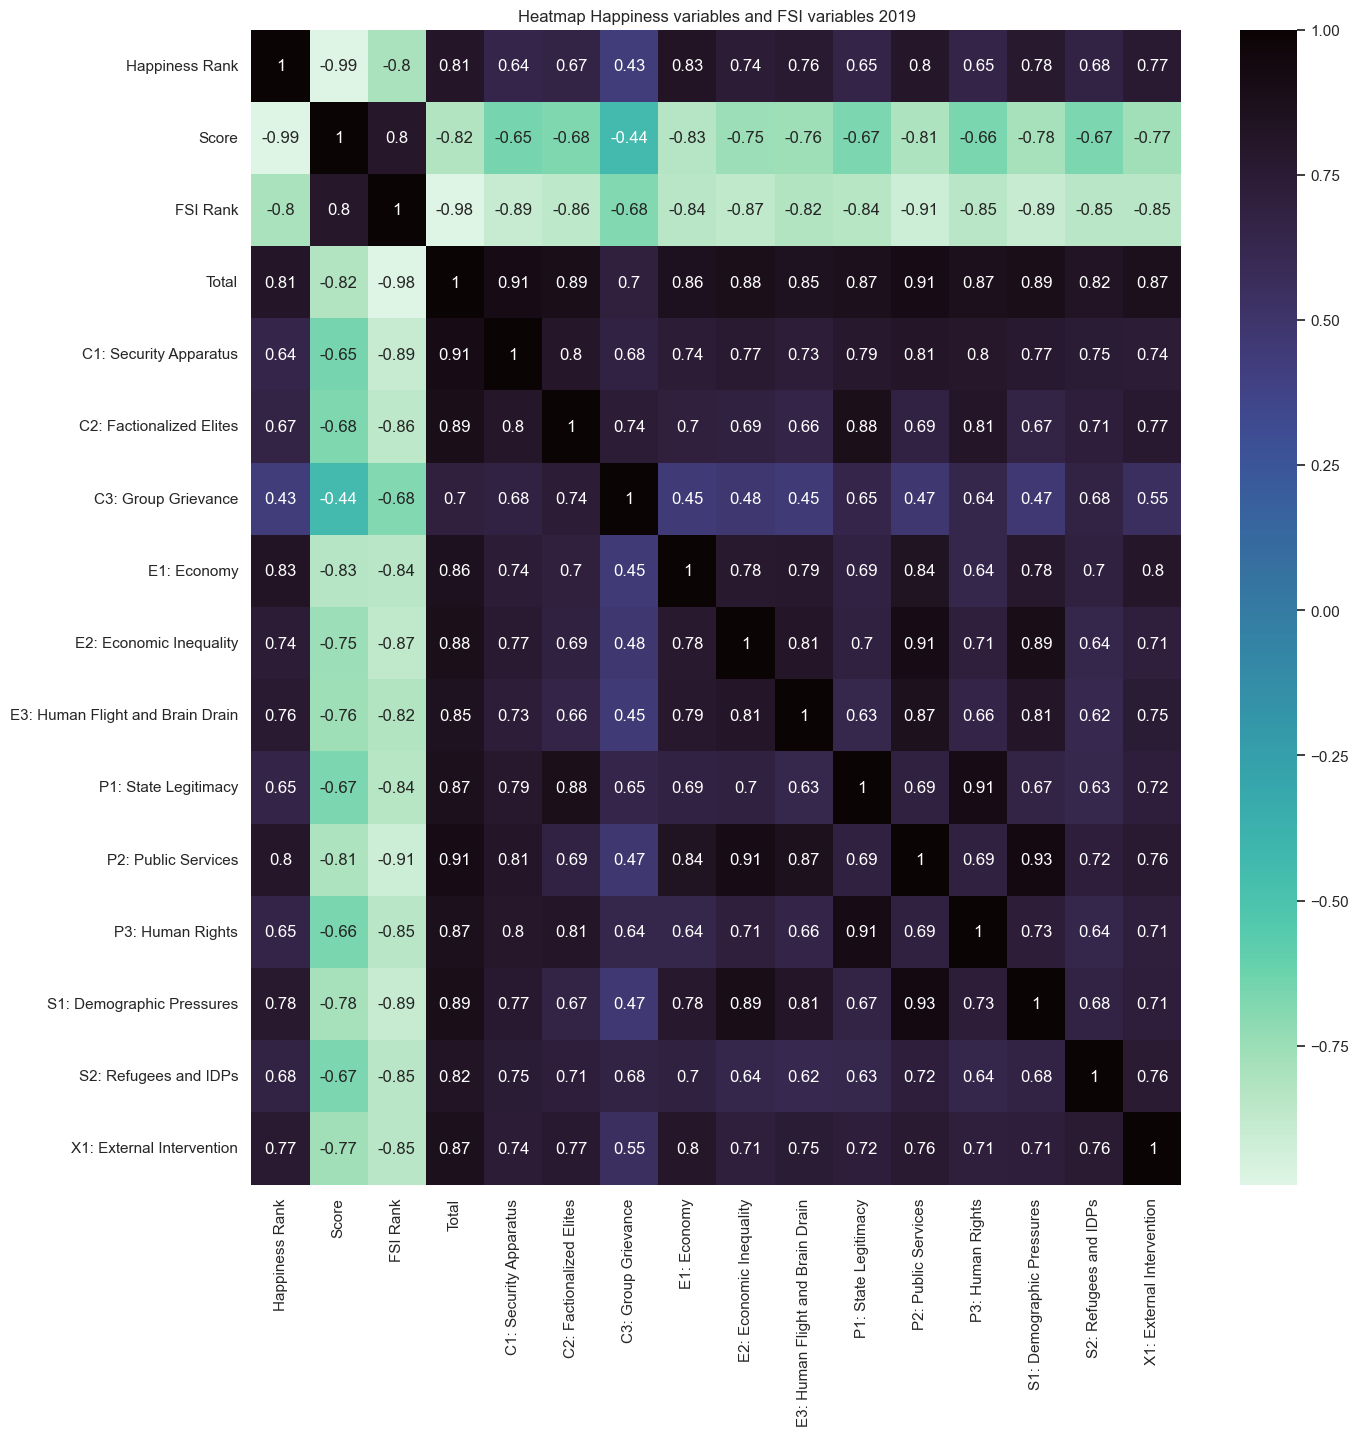

In [67]:
cols = ['Happiness Rank', 'Score', 'FSI Rank', 'Total', 'C1: Security Apparatus',
       'C2: Factionalized Elites', 'C3: Group Grievance', 'E1: Economy',
       'E2: Economic Inequality', 'E3: Human Flight and Brain Drain',
       'P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights',
       'S1: Demographic Pressures', 'S2: Refugees and IDPs',
       'X1: External Intervention']
plt.figure(figsize=(15, 15))
sns.heatmap(happiness_and_fsi[cols].corr(), annot=True, cmap='mako_r')
plt.title('Heatmap Happiness variables and FSI variables 2019')
plt.show()

8. Summary and Insights
* Document key findings and patterns.
* Interpret relationships between variables.
* Prepare the cleaned and transformed data for modeling.

In [68]:
# pip install pycountry

In [69]:
# pip install requests

In [70]:
happiness_score_2018['Country code'] = happiness_score_2018['Country or region'].apply(
    lambda x: pycountry.countries.lookup(x).alpha_2 if pycountry.countries.get(name=x) else None
)

NameError: name 'pycountry' is not defined

In [ ]:
happiness_score_2018['Country code'].unique()

In [ ]:
happiness_score_2018[happiness_score_2018['Country code'].isnull()]

In [ ]:
from PIL import Image
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Example country codes (ISO 3166-1 alpha-2)
countries = happiness_score_2018['Country code']
x = happiness_score_2018['Score']
y = happiness_score_2018['Overall rank']

# Function to fetch flag images
def get_flag_image(country_code):
    if country_code is None:
        return None  # Return None if country_code is None
    
    url = f"https://flagcdn.com/w320/{country_code.lower()}.png"  # URL for high-resolution flags
    response = requests.get(url)
    if response.status_code == 200:
        return Image.open(BytesIO(response.content))
    return None

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

for i, country in enumerate(countries):
    country_code = country  # Assuming countries are already in ISO alpha-2 format
    
    # Skip None or invalid country codes
    if country_code is None:
        print(f"Skipping row {i} with missing country code.")
        continue
    
    # Debug print statement
    print(f"Fetching flag for: {country_code}")
    
    flag_img = get_flag_image(country_code)
    
    # Debugging the flag_img
    if flag_img is None:
        print(f"Failed to get image for {country_code}")
        continue  # Skip if no valid image is returned
    
    # Check if the flag image is not None
    if isinstance(flag_img, Image.Image):  # Ensure it's a valid Image object
        imagebox = OffsetImage(flag_img, zoom=0.15)
        ab = AnnotationBbox(imagebox, (x[i], y[i]), frameon=False)
        ax.add_artist(ab)
    else:
        print(f"Invalid image for {country_code}")

# Adjust the axis limits based on the data
ax.set_xlim(min(x) - 1, max(x) + 1)
ax.set_ylim(min(y) - 1, max(y) + 1)

ax.set_xlabel("Score")
ax.set_ylabel("Overall Rank")
ax.set_title("Scatter Plot with Country Flags")

plt.grid(True)
plt.show()